# Desafio Ifood: Análise exploratória de dados

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

* Perfis de clientes
* Preferências do produto
* Sucesso/fracassos da campanha
* Desempenho do canal

O objetivo de hoje é fazer uma análise exploratória desses dados.

In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Primeiramente realiza-se a leitura dos dados que estão no arquivo mkt_data.csv.

In [5]:
dataframe = pd.read_csv('mkt_data.csv')

dataframe

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


Podemos checar que a nossa tabela possui 2205 linhas e 44 colunas.

Depois, verificamos os tipos das colunas. Todas são numéricas exceto marital_status e education_level.

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 44 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            2205 non-null   int64  
 1   Income                2205 non-null   float64
 2   Kidhome               2205 non-null   int64  
 3   Teenhome              2205 non-null   int64  
 4   Recency               2205 non-null   int64  
 5   MntWines              2205 non-null   int64  
 6   MntFruits             2205 non-null   int64  
 7   MntMeatProducts       2205 non-null   int64  
 8   MntFishProducts       2205 non-null   int64  
 9   MntSweetProducts      2205 non-null   int64  
 10  MntGoldProds          2205 non-null   int64  
 11  NumDealsPurchases     2205 non-null   int64  
 12  NumWebPurchases       2205 non-null   int64  
 13  NumCatalogPurchases   2205 non-null   int64  
 14  NumStorePurchases     2205 non-null   int64  
 15  NumWebVisitsMonth    

Agora, verifica-se a presença de valores duplicados na tabela.

In [7]:
#Não há valores duplicados
dataframe.duplicated().value_counts()

False    2205
dtype: int64

O código acima busca os valores duplicados e faz a soma. Pode-se perceber que há 2205 valores falsos, ou seja, todos são valores únicos.

Abaixo, procuramos se há valores nulos na tabela. Pode-se verificar que há valores nulos nas colunas de status civil e educação. Quando a pessoa é casada, por exemplo, os demais ficam com NaN. O mesmo acontece no caso de educação. Se uma pessoa tem phD, as demais também ficam com NaN.

In [8]:
dataframe.isnull().sum()

Unnamed: 0                 0
Income                     0
Kidhome                    0
Teenhome                   0
Recency                    0
MntWines                   0
MntFruits                  0
MntMeatProducts            0
MntFishProducts            0
MntSweetProducts           0
MntGoldProds               0
NumDealsPurchases          0
NumWebPurchases            0
NumCatalogPurchases        0
NumStorePurchases          0
NumWebVisitsMonth          0
AcceptedCmp3               0
AcceptedCmp4               0
AcceptedCmp5               0
AcceptedCmp1               0
AcceptedCmp2               0
Complain                   0
Z_CostContact              0
Z_Revenue                  0
Response                   0
Age                        0
Customer_Days              0
marital_Divorced        1975
marital_Married         1351
marital_Single          1728
marital_Together        1637
marital_Widow           2129
education_2n Cycle      2007
education_Basic         2151
education_Grad

Checando novamente todas as colunas para confirmar a situação daquelas que possuem NaN. Como repetem informações, elas poderiam ser retiradas. No lugar, é possível usar as informações de marital_status e education_level.

In [9]:
pd.set_option('display.max_columns', None)
df = dataframe.drop(columns = ['education_Basic', 'education_2n Cycle', 'education_Graduation','education_Master', 'education_PhD', 'marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow'])

In [10]:
#Verificando a exclusão das colunas
df.head()

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,407,392,0,Married,PhD,1,407


Aqui, para mostrar os valores de média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas, utiliza-se o describe().


In [11]:
df.describe().round(1)

,Unnamed: 0,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0,2205.0
mean,1102.0,51622.1,0.4,0.5,49.0,306.2,26.4,165.3,37.8,27.1,44.1,2.3,4.1,2.6,5.8,5.3,0.1,0.1,0.1,0.1,0.0,0.0,3.0,11.0,0.2,51.1,2512.7,562.8,518.7,0.3,0.9,562.8
std,636.7,20713.1,0.5,0.5,28.9,337.5,39.8,217.8,54.8,41.1,51.7,1.9,2.7,2.8,3.2,2.4,0.3,0.3,0.3,0.2,0.1,0.1,0.0,0.0,0.4,11.7,202.6,575.9,553.8,0.7,0.7,575.9
min,0.0,1730.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,24.0,2159.0,4.0,-283.0,0.0,0.0,4.0
25%,551.0,35196.0,0.0,0.0,24.0,24.0,2.0,16.0,3.0,1.0,9.0,1.0,2.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,43.0,2339.0,56.0,42.0,0.0,0.0,56.0
50%,1102.0,51287.0,0.0,0.0,49.0,178.0,8.0,68.0,12.0,8.0,25.0,2.0,4.0,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,50.0,2515.0,343.0,288.0,0.0,1.0,343.0
75%,1653.0,68281.0,1.0,1.0,74.0,507.0,33.0,232.0,50.0,34.0,56.0,3.0,6.0,4.0,8.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0,61.0,2688.0,964.0,884.0,0.0,1.0,964.0
max,2204.0,113734.0,2.0,2.0,99.0,1493.0,199.0,1725.0,259.0,262.0,321.0,15.0,27.0,28.0,13.0,20.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,11.0,1.0,80.0,2858.0,2491.0,2458.0,4.0,3.0,2491.0


#Qual o perfil dos clientes?

## Salário

O maior valor de salário encontrado na base é de 113734.

In [12]:
df['Income'].max()

113734.0

<Axes: >

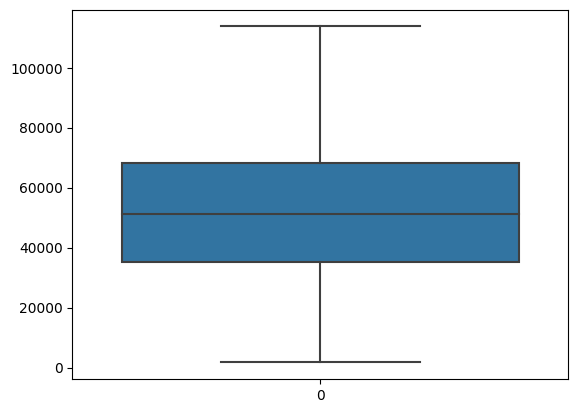

In [13]:
sns.boxplot(df.Income)

<Axes: >

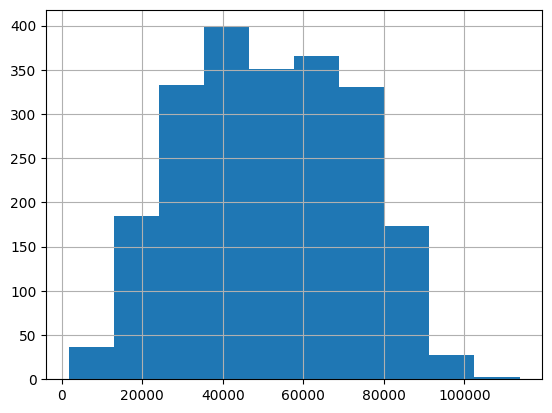

In [14]:
df['Income'].hist()

In [15]:
df['Income'].describe()

count      2205.000000
mean      51622.094785
std       20713.063826
min        1730.000000
25%       35196.000000
50%       51287.000000
75%       68281.000000
max      113734.000000
Name: Income, dtype: float64

Há pessoas que ganham um valor muito alto (113734), mas também há aqueles que ganham um valor muito baixo (1730). A média é em 51622 e o desvio é de 20713 (muitos dados se afastam da média). Não há outliers.

In [16]:
df["Income"].std()/df["Income"].mean()

0.4012441554786958

In [17]:
df["Income"].skew()

0.013164263414417078

Acima, calcula-se o coeficiente de variação (CV), que é um indicador da variabilidade de um conjunto de dados. Sua medida corresponde à razão percentual entre o desvio-padrão e a média dos dados.

Com o CV, o skew e os demais dados, pode-se dizer que a curva se aproxima de uma normal.

## Nível de educação

Verificando os níveis de educação dos clientes, chega-se à informação de o nível de Graduação é o mais frequente (1113 casos) seguido por PhD (476) e Master (364).

<Axes: xlabel='education_level', ylabel='count'>

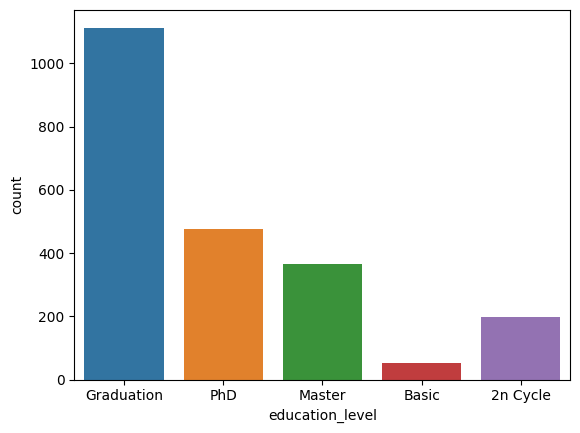

In [18]:
sns.countplot(x=df["education_level"])

In [19]:
df['education_level'].describe()

count           2205
unique             5
top       Graduation
freq            1113
Name: education_level, dtype: object

In [20]:
df['education_level'].value_counts()

Graduation    1113
PhD            476
Master         364
2n Cycle       198
Basic           54
Name: education_level, dtype: int64

## Status civil

Quanto ao status civil, a maioria está casada (854). Depois temos pessoas que moram junto aos parceiros (586) e solteiras somam 477. Divorciados são 230 e viúvos são 76.

<Axes: xlabel='marital_status', ylabel='count'>

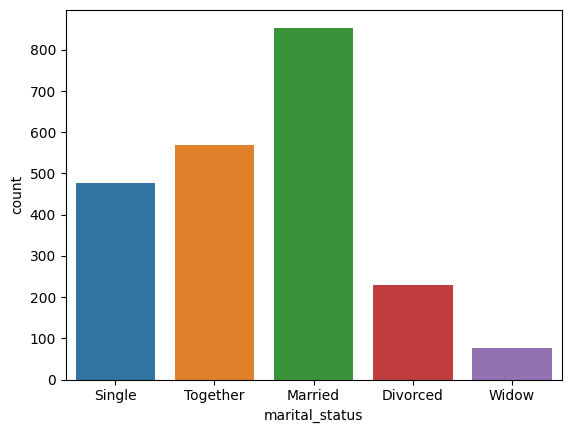

In [21]:
sns.countplot(x=df["marital_status"])

In [31]:
df['marital_status'].value_counts()

Married     854
Together    568
Single      477
Divorced    230
Widow        76
Name: marital_status, dtype: int64

# Outras perguntas

* Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?
* As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?
* Pessoas que têm um maior salário gastam mais? Veja nas colunas Income e expenses

##Status civil e quantidade de filhos

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Single'),
  Text(1, 0, 'Together'),
  Text(2, 0, 'Married'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widow')])

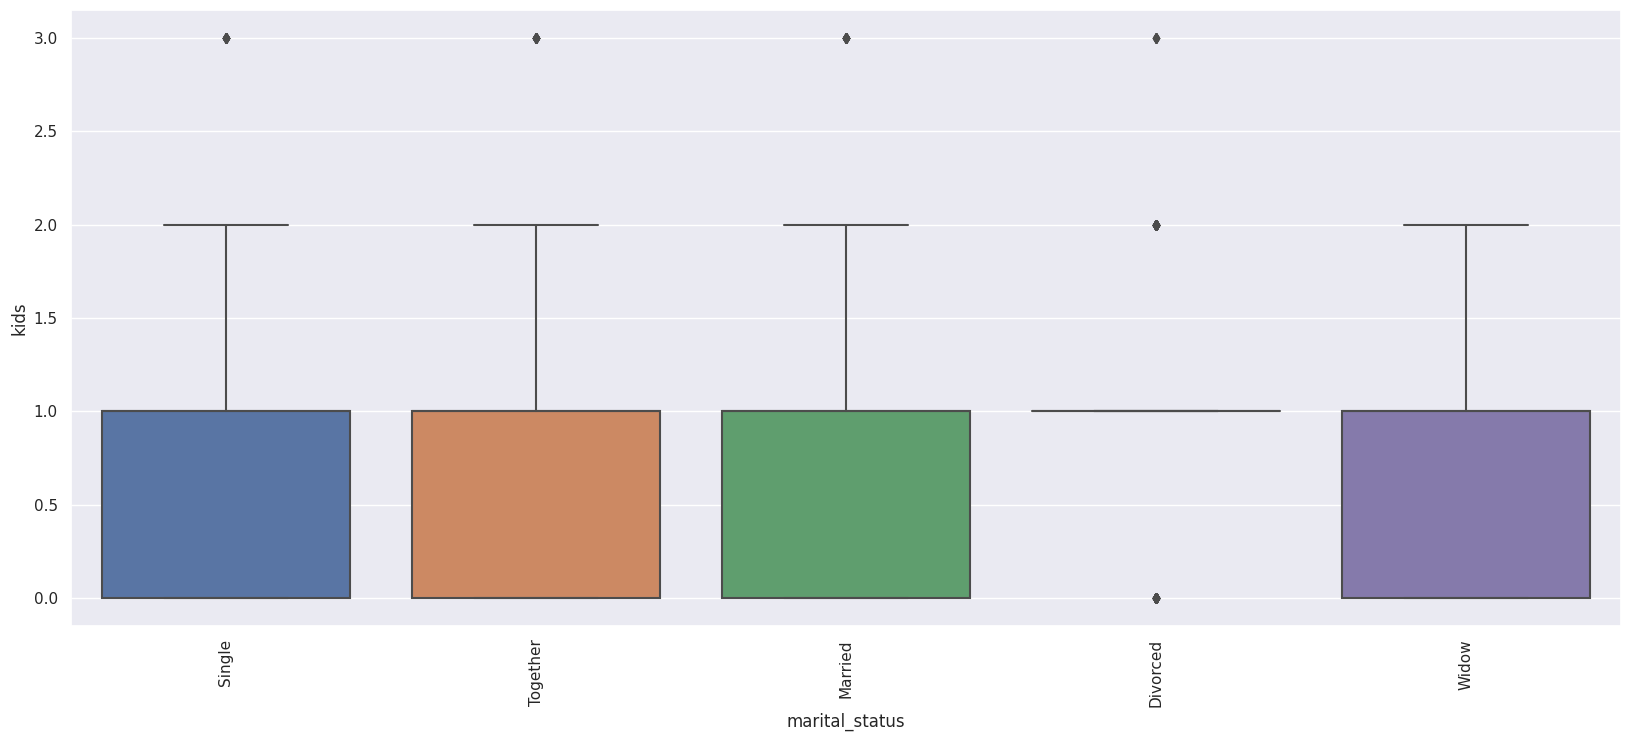

In [32]:
sns.boxplot(x="marital_status", y="kids", data=df)
plt.xticks(rotation=90)

In [24]:
df.groupby(["marital_status"])["kids"].describe()

,count,mean,std,min,25%,50%,75%,max
marital_status,,,,,,,,
Divorced,230.0,1.008696,0.741716,0.0,1.0,1.0,1.0,3.0
Married,854.0,0.967213,0.732019,0.0,0.0,1.0,1.0,3.0
Single,477.0,0.859539,0.777289,0.0,0.0,1.0,1.0,3.0
Together,568.0,0.980634,0.749823,0.0,0.0,1.0,1.0,3.0
Widow,76.0,0.881579,0.747745,0.0,0.0,1.0,1.0,2.0


In [25]:
df.groupby("marital_status")["kids"].mean()

marital_status
Divorced    1.008696
Married     0.967213
Single      0.859539
Together    0.980634
Widow       0.881579
Name: kids, dtype: float64

In [26]:
df.groupby("marital_status")["kids"].median()

marital_status
Divorced    1.0
Married     1.0
Single      1.0
Together    1.0
Widow       1.0
Name: kids, dtype: float64

Olhando a média, as pessoas solteiras possuem menos filhos do que as demais. Verificando a mediana, os números são todos próximos.

##Gastos e quantidade de filhos

<Axes: xlabel='kids', ylabel='expenses'>

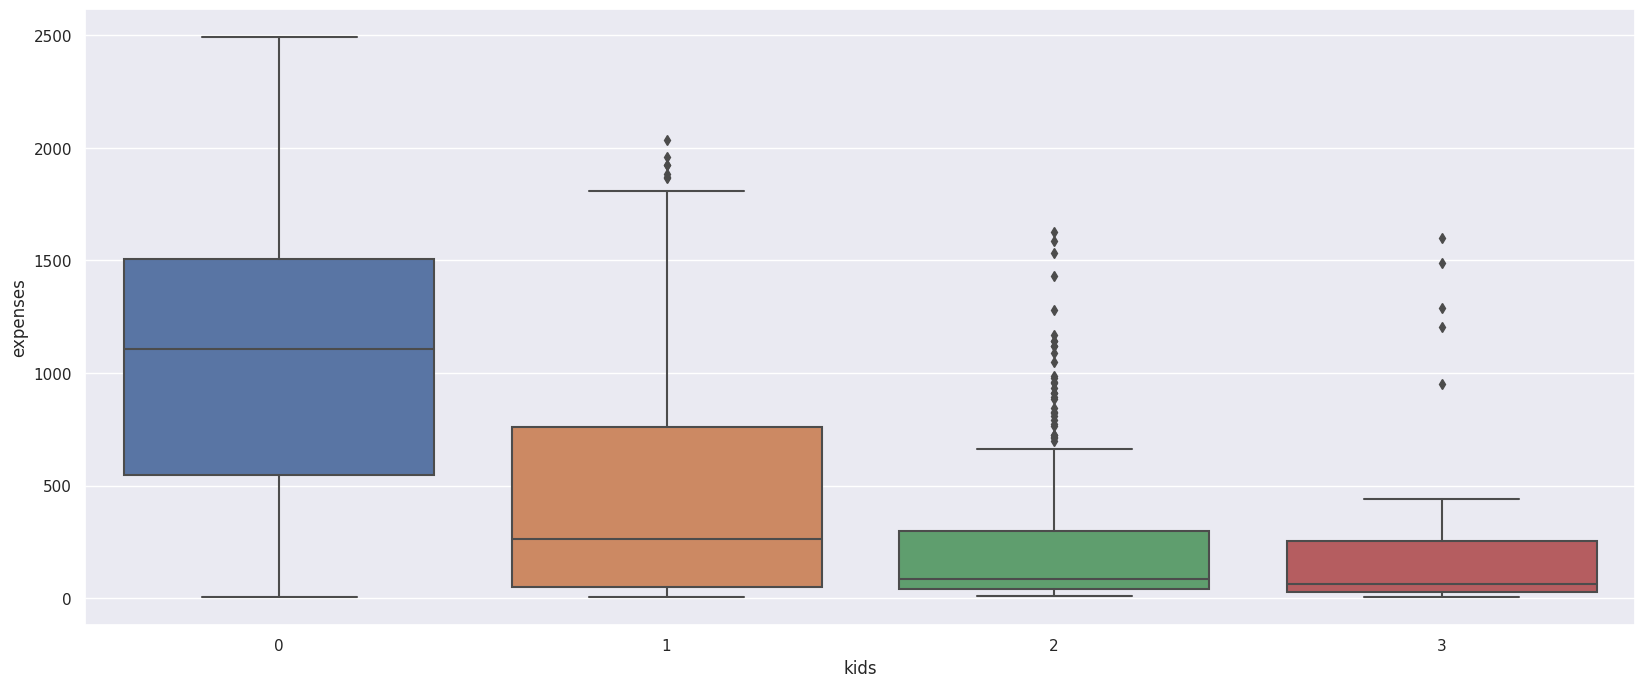

In [33]:
sns.boxplot(x='kids', y='expenses', data=df)

In [34]:
df.groupby("kids")["expenses"].mean()

kids
0    1041.207006
1     434.530576
2     221.568675
3     237.380000
Name: expenses, dtype: float64

In [35]:
df.groupby("kids")["expenses"].median()

kids
0    1106.5
1     264.0
2      84.0
3      62.0
Name: expenses, dtype: float64

A média do grupo 0 e a mediana são próximas. No entanto, a média do grupo 1 é maior do que a mediana. Em relação aos grupos 2 e 3, as médias são mais altas do que as medianas, indicando que há outliers que puxam a média para cima. (No boxplot também é possível verificar esta informação).

##Pessoas com maior salário gastam mais?

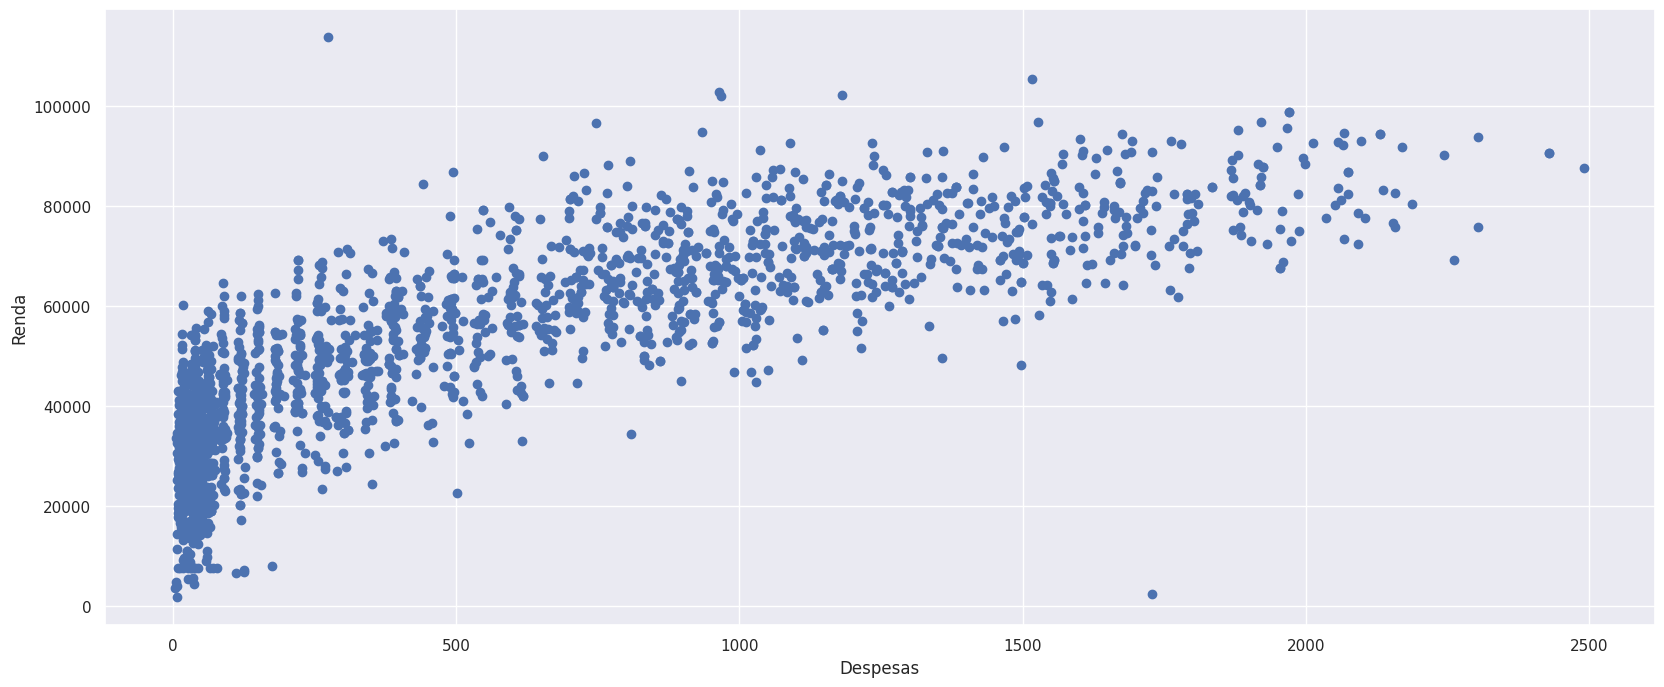

In [38]:
plt.scatter(df["expenses"], df["Income"])
plt.xlabel("Despesas")
plt.ylabel("Renda")
plt.show()

In [37]:
df["expenses"].corr(df["Income"])

0.8230660021398378

Como a correlação 0.82, quer dizer que há uma correlação. Assim, quem recebe mais dinheiro também gasta mais.